(advection:solution)=
### Advection diffusion equation

**Task 4**:Solve the Advection-Diffusion equation, with the following initial and boundary conditions: at t=0 , 𝑐_0=0; for all subsequent times, 𝑐=0 at x=0, 𝑐=1 at 𝑥=𝐿=1, 𝑢=1.0 and K=0.1. Integrate over 0.05 s with a Δ𝑡=0.0028. Plot the results and the dimensionless time scales. Increase gradually Δ𝑡 and analyse the results. Once you understand what is happening, set again Δ𝑡=0.0028 and gradually increase the wind speed. Discuss the results.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


def advection_diffusion(u, K, integration, dt, Nx):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nx          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
    
    # Definitions and assignments
    a   = 0.                # Left border
    b   = 1.                # Right border
    dx  = (b-a)/Nx          # Distance between grid points

    # Define the boundary conditions
    bc_l  = 1       # Left BC
    bc_r  = 0       # Right BC

    # Define index arrays 
    k   = np.arange(1,Nx-1)
    kr  = np.arange(2,Nx)
    kl  = np.arange(0,Nx-2)

    # Initial quantity field
    phi = np.zeros(Nx)
                 
    # Set boundary condiiton
    phi[Nx-1] = bc_r
    phi[0] = bc_l

    # Dimensionless parameters
    d = (K*dt)/(dx**2)
    c = (u*dt)/dx

    # Time loop
    t = 0

    while t <= integration:
        # Update flux
        phi[k] = (1-2*d)*phi[k] + (d-(c/2))*phi[kr] + (d+(c/2))*phi[kl]
        t = t + dt    
        
    return(phi, dx, u, K, c, d)




dt (advection) <= 0.0075 s
dt (diffusion) <= 0.0031 s

Courant number (c): 0.1120 (C<1)
Characteristic diffusion time (d): 0.4480


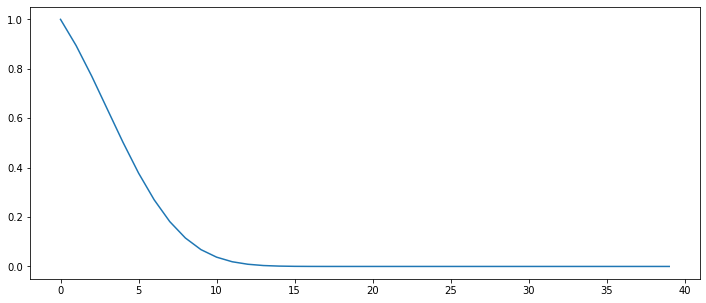

In [2]:
phi, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.1, integration=0.05, dt=0.0028, Nx=40)

print("dt (advection) <= {:.4f} s".format((0.3*dx)/u))
print("dt (diffusion) <= {:.4f} s".format(((dx**2))/(2*K)))
print('')       
print('Courant number (c): {:.4f} (C<1)'.format(c))
print('Characteristic diffusion time (d): {:.4f}'.format(d))

plt.figure(figsize=(12,5))
plt.plot(phi)
plt.show()

**Task 5**: Solve the Advection-Diffusion equation, with the following initial and boundary conditions: 

\begin{align}
c(n,0) &=exp^{\left(-\left(\frac{(x-10)}{2}\right)^2\right)} \\
c(0,t) &=0 \\
c(L,t) &=\frac{\partial c}{\partial x}=0
\end{align}

Integrate the equation with K=0.1, u=1.0 over 0.05 s with a Δ𝑡=0.0028. Plot the results and the dimensionless time scales. Increase gradually Δ𝑡 and plot and analyse the results.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


def advection_diffusion(u, K, integration, dt, Nx):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nx          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
    
    # Definitions and assignments
    a   = 0.                # Left border
    b   = 1.                # Right border
    dx  = (b-a)/Nx          # Distance between grid points

    # Define the boundary conditions
    bc_l  = 0       # Left BC
    bc_r  = 0       # Right BC

    # Define index arrays 
    k   = np.arange(1,Nx-1)
    kr  = np.arange(2,Nx)
    kl  = np.arange(0,Nx-2)

    # Initial temperature field
    phi = 1+np.sin((2*np.pi*np.arange(Nx))/Nx)
    phi = np.exp(-((np.arange(Nx)-10)/2)**2)
                 
    # Set boundary condiiton
    phi[Nx-1] = bc_r
    phi[0] = bc_l

    # Dimensionless parameters
    d = (K*dt)/(dx**2)
    c = (u*dt)/dx

    # Time loop
    t = 0
  
    while t <= integration:
        # Set BC
        phi[Nx-1] = phi[Nx-2]
        
        # Update flux
        phi[k] = (1-2*d)*phi[k] + (d-(c/2))*phi[kr] + (d+(c/2))*phi[kl]

        # Increate time
        t = t + dt    
        
    return(phi, dx, u, K, c, d)





dt (advection) <= 0.0075 s
dt (diffusion) <= 0.0031 s

Courant number (c): 0.1120 (C<1)
Characteristic diffusion time (d): 0.4480


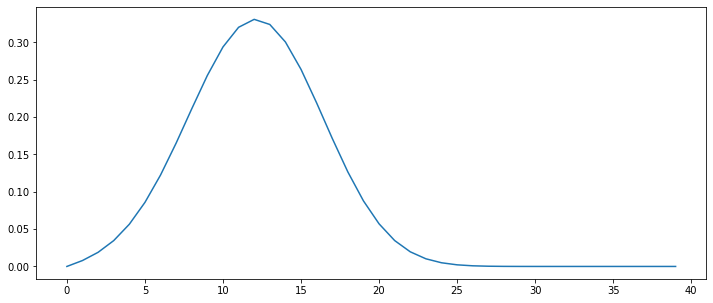

In [4]:
phi, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.1, integration=0.05, dt=0.0028, Nx=40)

print("dt (advection) <= {:.4f} s".format((0.3*dx)/u))
print("dt (diffusion) <= {:.4f} s".format(((dx**2))/(2*K)))
print('')       
print('Courant number (c): {:.4f} (C<1)'.format(c))
print('Characteristic diffusion time (d): {:.4f}'.format(d))

plt.figure(figsize=(12,5))
plt.plot(phi)
plt.show()

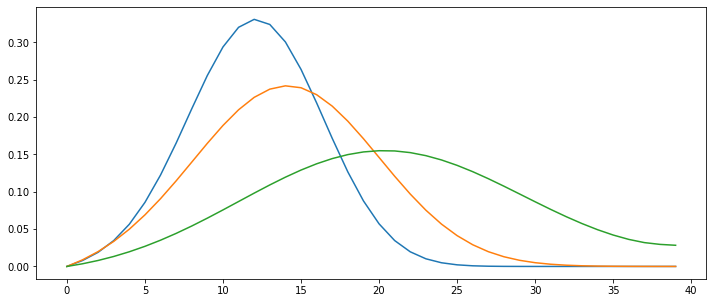

In [5]:
phi1, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.1, integration=0.05, dt=0.0028, Nx=40)
phi2, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.1, integration=0.1, dt=0.0028, Nx=40)
phi3, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.1, integration=0.25, dt=0.0028, Nx=40)

plt.figure(figsize=(12,5))
plt.plot(phi1)
plt.plot(phi2)
plt.plot(phi3)
plt.show()

**Task 6**: Boundary layer evolution

In [204]:
import random

def boundary_layer(w, K, integration, dt, Nz, H):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nz          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
    
    # Definitions and assignments
    a   = 0.                # Left border
    b   = H                 # Right border
    dz  = (b-a)/Nz          # Distance between grid points

    # Define the boundary conditions
    bc_t  = 0       # top BC
    bc_b  = 0       # bottom BC

    # Define index arrays 
    k   = np.arange(1,Nz-1)
    kr  = np.arange(2,Nz)
    kl  = np.arange(0,Nz-2)

    # Initial temperature field
    theta = 290 * np.ones(Nz)
    cov = np.zeros(Nz)
    theta_all = np.zeros((Nz,int(integration/dt)))
    cov_all = np.zeros((Nz,int(integration/dt)))

    # Dimensionless parameters
    d = (K*dt)/(dz**2)
    c = (w*dt)/dz
    
    t = 0
    
    for idx in range(int(integration/dt)):
        
        # Set BC top
        theta[Nz-1] = theta[Nz-2] + 0.01 * dz
        
        # Set BC surface
        theta[0] = 290 + random.normalvariate(10,2) * np.sin((2*math.pi*t)/86400)
        
        # Update flux
        theta[k] = (1-2*d)*theta[k] + (d-(c/2))*theta[kr] + (d+(c/2))*theta[kl]
        theta_all[:,idx] = theta[:]
        
        cov[k] = -K*((theta[kr]-theta[kl])/(2*dz))
        cov[0] = cov[1]
        cov_all[:,idx] = cov[:]
                
        t = t + dt
        
    return(theta_all, cov_all, dz, u, K, c, d)



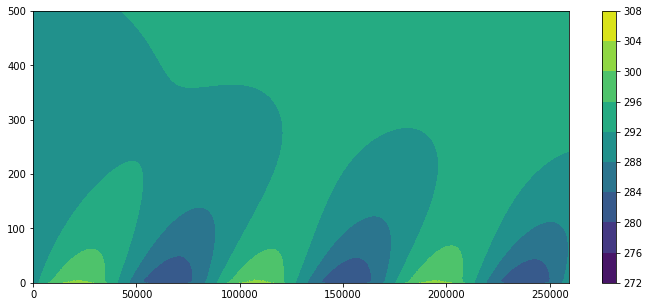

In [205]:
Nz = 200
H = 500
integration = 86400*3
dt = 1

phi1, cov, dx, u, K, c, d = boundary_layer(w=-0.001, K=0.5, integration=integration, dt=dt, Nz=Nz, H=H)

# Create 2D mesh grid
# First create the y-axis values
y = np.linspace(0, H, Nz)
# then the x-axis values
x = np.arange(integration/dt)
# use the arrays to create a 2D-mesh
X, Y = np.meshgrid(x, y)

# Plot results on the mesh
plt.figure(figsize=(12,5))
plt.contourf(X,Y,phi1[:],10,origin='lower')
plt.colorbar()


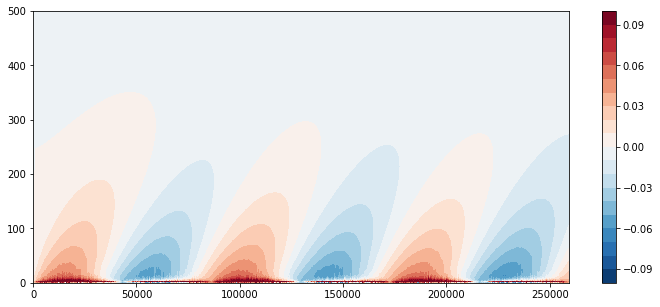

In [203]:
# Plot results on the mesh
plt.figure(figsize=(12,5))
plt.contourf(X,Y,cov[:],10,origin='lower',levels=np.linspace(-0.1, 0.1, 21),cmap='RdBu_r')
plt.colorbar()